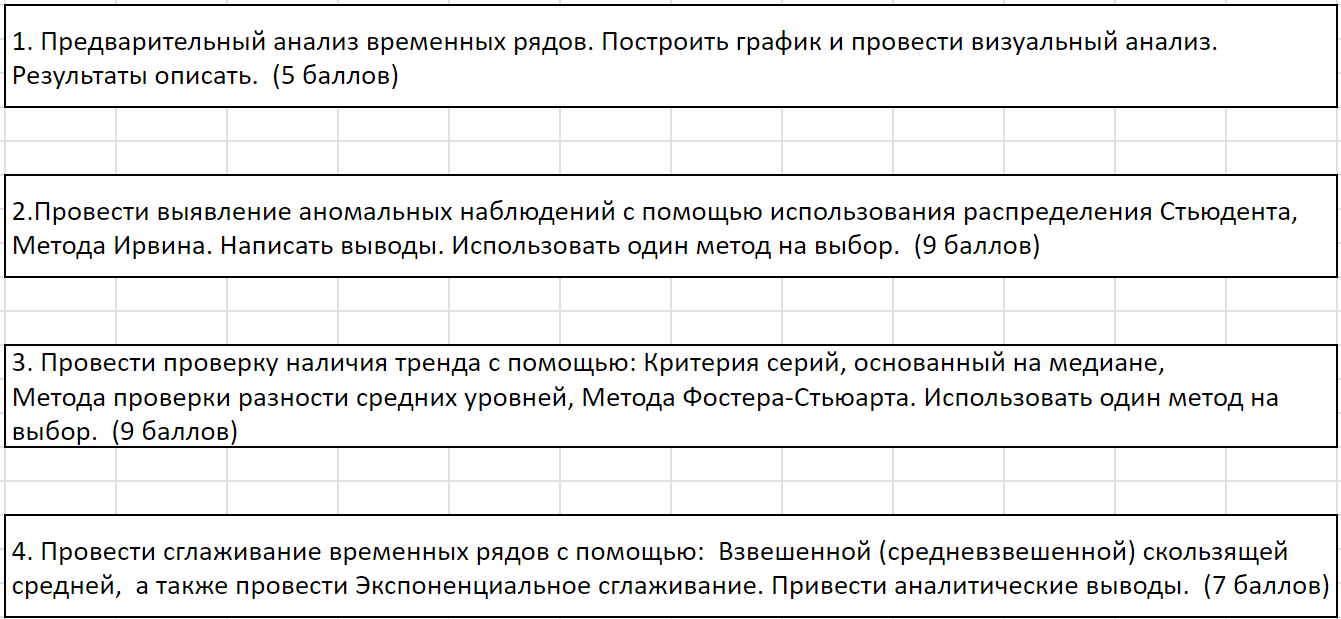

In [ ]:
# Данный прототип относится к вариантам [1, 3, 6, 9, 17]

VARIANT = 1

In [ ]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import f, t
from scipy import stats
import plotly.graph_objects as go
%matplotlib inline

In [ ]:
df = pd.read_excel(
    'Задача экзамен ПМ20-4.xlsx',
    sheet_name='Вариант1',
    decimal=','
)
df = df[['T','EMPLDEC_Y']].iloc[1:].dropna()
df.EMPLDEC_Y = df.EMPLDEC_Y .astype(float)
df.rename(columns={'T': 'YEAR'}, inplace=True)
df

,YEAR,EMPLDEC_Y
1,1994.0,347.0
2,1995.0,384.0
3,1996.0,314.6
4,1997.0,341.2
5,1998.0,397.3
6,1999.0,535.6
7,2000.0,798.0
8,2001.0,971.0
9,2002.0,958.8
10,2003.0,941.8


In [ ]:
# проверяем, что все значения в столбце YEAR последовательные

uniq = np.unique(np.diff(df['YEAR'], 1))
True if uniq == [1] else False

True

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 1 to 28
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   YEAR       28 non-null     float64
 1   EMPLDEC_Y  28 non-null     float64
dtypes: float64(2)
memory usage: 580.0 bytes


## Задание №1

**Предварительный анализ временных рядов. Построить график и провести визуальный анализ. Результаты описать. (5 баллов)**

In [ ]:
base = df['EMPLDEC_Y'][:-1].to_numpy()
shift = df['EMPLDEC_Y'][1:].to_numpy()
percent_delta = np.round((shift - base) / base, 2)
percent_delta = np.insert(percent_delta, 0, 0)
percent_delta

array([ 0.  ,  0.11, -0.18,  0.08,  0.16,  0.35,  0.49,  0.22, -0.01,
       -0.02, -0.02, -0.01,  0.1 ,  0.2 ,  0.12, -0.25,  0.09,  0.21,
        0.15,  0.12,  0.08, -0.3 , -0.  ,  0.15,  0.07,  0.02, -0.03,
        0.28])

In [ ]:
df.describe()

,YEAR,EMPLDEC_Y
count,28.000000,28.000000
mean,2007.500000,1102.178571
std,8.225975,487.580379
min,1994.000000,314.600000
25%,2000.750000,885.750000
50%,2007.500000,1062.750000
75%,2014.250000,1499.500000
max,2021.000000,2024.300000


In [ ]:
fig = px.bar(x=df["YEAR"], y=percent_delta, width=950, height=600, title='Изменение потребности в сотрудниках по годам')

fig.update_layout(
    margin=dict(l=20, r=20, t=30, b=20),
    paper_bgcolor="LightSteelBlue",
)

fig.show()

In [ ]:
fig = px.line(df, x="YEAR", y="EMPLDEC_Y", width=950, height=600, title='Потребность в сотрудниках по годам')

fig.update_layout(
    margin=dict(l=20, r=20, t=30, b=20),
    paper_bgcolor="LightSteelBlue",
)

fig.show()

In [ ]:
fig = px.box(df, y="EMPLDEC_Y")

fig.update_layout(
    margin=dict(l=20, r=20, t=30, b=20),
    paper_bgcolor="LightSteelBlue",
)

fig.show()

In [ ]:
df.describe()

,YEAR,EMPLDEC_Y
count,28.000000,28.000000
mean,2007.500000,1102.178571
std,8.225975,487.580379
min,1994.000000,314.600000
25%,2000.750000,885.750000
50%,2007.500000,1062.750000
75%,2014.250000,1499.500000
max,2021.000000,2024.300000


Мы получили значение среднего, медианы, стандрартного отколонения, первого и третьего квартиля, минимального и максимального значения.

Можем сказать, что выбросов нет.

Также по графику видим, что он растет, не равномерно, но тренд восходящий.

## Задание №2. Аномалии

**Провести выявление аномальных наблюдений с помощью использования распределения Стьюдента, Метода Ирвина. Написать выводы. Использовать один метод на выбор.  (9 баллов)**

In [ ]:
fig = px.box(df, y="EMPLDEC_Y", points="all")

fig.update_layout(
    margin=dict(l=20, r=20, t=30, b=20),
    paper_bgcolor="LightSteelBlue",
)

fig.show()

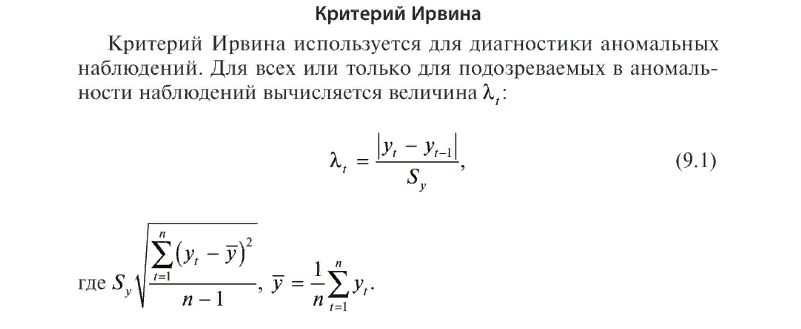

Сезонности нет, можем применить метод Ирвина

In [ ]:
values = df['EMPLDEC_Y'].to_numpy()

n = len(values)
y_mean = values.mean()

S_y = math.sqrt(
    ((values - y_mean)**2).sum() / (n-1)
)

S_y

487.58037920990654

In [ ]:
lambda_t = abs(np.diff(values)) / S_y

print(f"Максимум: {max(lambda_t)}")

Максимум: 1.1565272600053447


Берем максимум для того, чтобы проверить максимальное значение на аномалию, если оно не аномально, то и все другие соответственно тоже.


In [ ]:
fig = px.line(x=df["YEAR"][1:], y=lambda_t, width=950, height=600, title='Значения критерия Ирвина')

fig.update_layout(
    margin=dict(l=20, r=20, t=30, b=20),
    paper_bgcolor="LightSteelBlue",
)

fig.show()

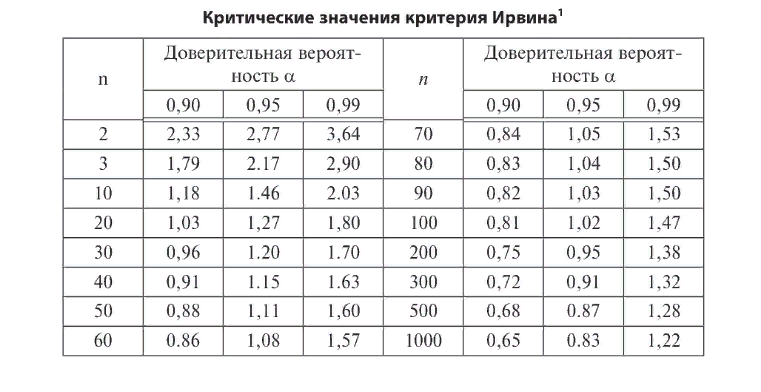

In [ ]:
# берём доверительную вероятность alpha = 0.95 и n = 30

critical_value = 1.20

lambda_t = lambda_t[lambda_t > critical_value]
if len(lambda_t) == 0:
    print('Аномальные значения отсутствуют')
else:
    print(f"Аномальные значения: {lambda_t}")

Аномальные значения отсутствуют


## Задание №3. Наличие тренда

**Провести проверку наличия тренда с помощью:**
- Критерия серий, основанный на медиане,
- Метода проверки разности средних уровней,
- Метода Фостера-Стьюарта.

**Использовать один метод на выбор. (9 баллов)**

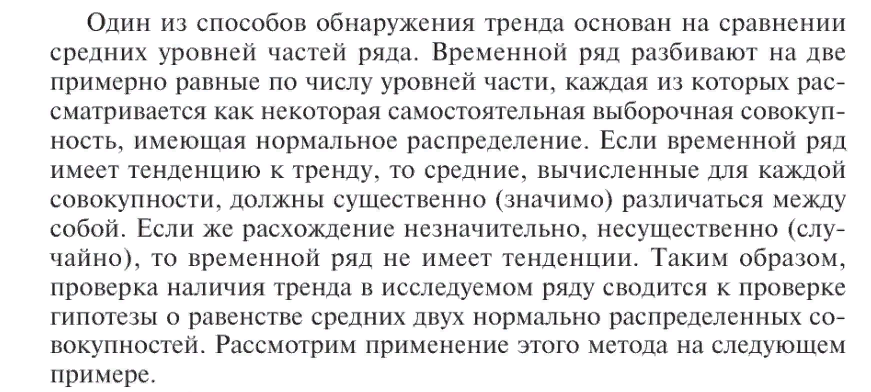

In [ ]:
# делим исходный ряд на две примерно равные части

values = df['EMPLDEC_Y'].to_numpy()
n = len(values)

first_part, second_part = values[:n//2], values[n//2:]
n1, n2 = len(first_part), len(second_part)

n, n1, n2

(28, 14, 14)

In [ ]:
# вычисляем средние значения и дисперсии для каждой части

first_mean, second_mean = first_part.mean(), second_part.mean()

first_dispersion = ((first_part - first_mean)**2).sum() / (n1-1)
second_dispersion = ((second_part - second_mean)**2).sum() / (n2-1)

print(f"Среднее первой части: {first_mean}\nДисперсия первой части: {first_dispersion}")
print()
print(f"Среднее второй части: {second_mean}\nДисперсия второй части: {second_dispersion}")

Среднее первой части: 717.2285714285715
Дисперсия первой части: 97817.80835164835

Среднее второй части: 1487.1285714285716
Дисперсия второй части: 76767.79450549452


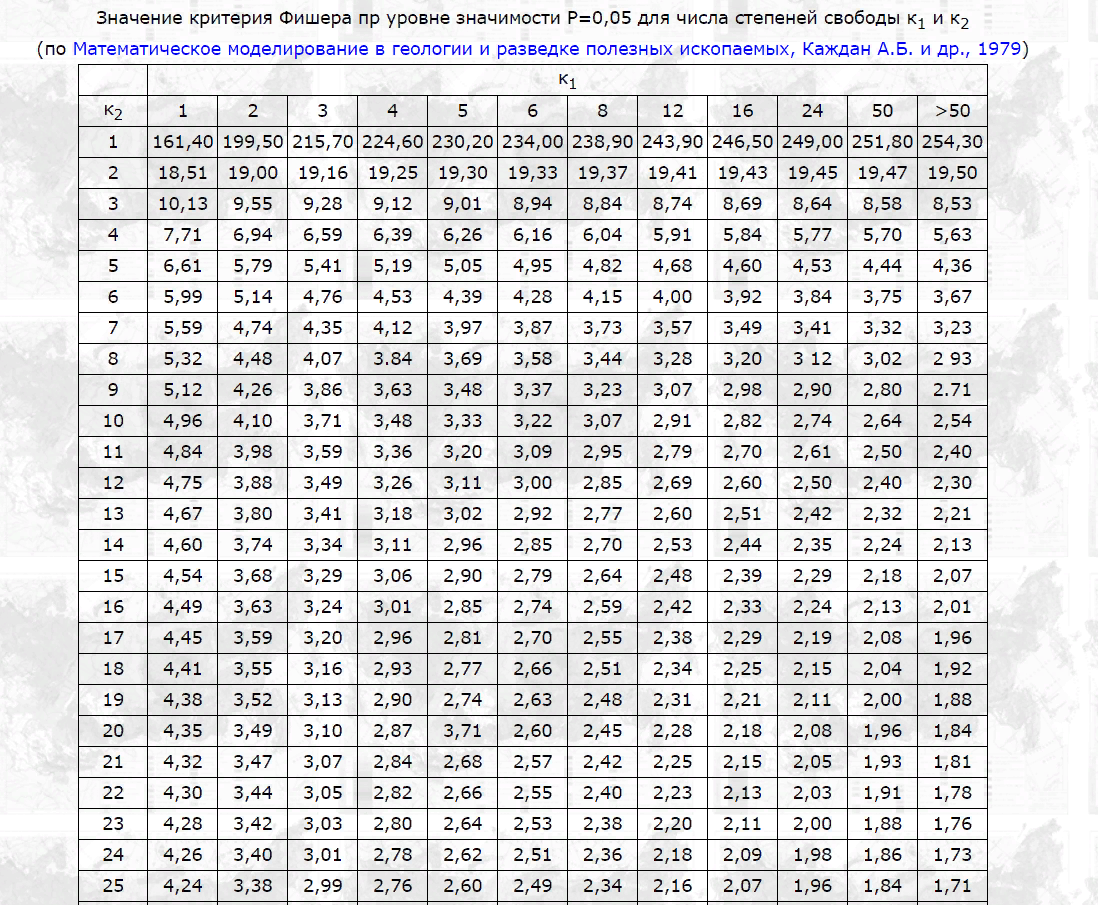

In [ ]:
# проверяем гипотезу о равенстве дисперсий с помощью F-критерия (0.05, 13, 13)

F_calc = max(first_dispersion, second_dispersion) / min(first_dispersion, second_dispersion)
F_critical = f.ppf(0.95, n1-1, n2-1)

print(f"F-рассчитанный: {F_calc}")
print(f"F-критический: {F_critical}")

F-рассчитанный: 1.274203707189311
F-критический: 2.576927084472978


F-рассчитанный оказался меньше F-критический.

Это значит, что условие выполнинось и мы можем перейти к следующему этапу.

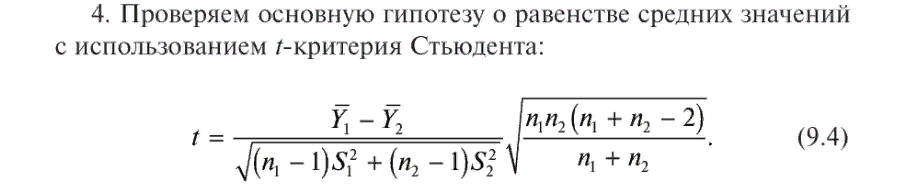

In [ ]:
t_calc = (first_mean - second_mean) / math.sqrt((n1-1)*first_dispersion + (n2-1)*second_dispersion) * math.sqrt(n1*n2*(n1+n2-2) / (n1+n2))

t_critical = t.ppf(1-.05/2, n1+n2-2)

print(f"t-рассчитанный: {abs(t_calc)}")
print(F"t-критический: {t_critical}")

t-рассчитанный: 6.89436265072147
t-критический: 2.055529438642871


In [ ]:
t_statistic, p_value = stats.ttest_ind(second_part, first_part)

t_critical = t.ppf(1-.05/2, n1+n2-2) # Уровень значимости 0,05 делится пополам, чтобы учитывать как левый, так и правый хвост распределения.

print("t-статистика:", t_statistic)
print(F"t-критический: {t_critical}")
#print("p-значение:", p_value)

t-статистика: 6.8943626507214715
t-критический: 2.055529438642871


Так как найденная t расчетное больше t критического с заданными параметрами, то можно сделать вывод, средние статистически не равны и тренд есть

## Задание №4. Сглаживание

**Провести сглаживание временных рядов с помощью:**
- Взвешенной (средневзвешенной) скользящей средней
- Экспоненциальное сглаживание.

**Привести аналитические выводы. (7 баллов)**

In [ ]:
def get_rolling_mean(k):
    rolling_mean = df["EMPLDEC_Y"].rolling(window=k, min_periods=1).mean()
    return rolling_mean

fig = go.Figure()

fig.add_trace(go.Scatter(x=df['YEAR'], y=get_rolling_mean(3),
                    mode='lines',
                    name=f'Сглаженный ряд, k={3}')
)

fig.add_trace(go.Scatter(x=df['YEAR'], y=get_rolling_mean(5),
                    mode='lines',
                    name=f'Сглаженный ряд, k={5}')
)

fig.add_trace(go.Scatter(x=df['YEAR'], y=df["EMPLDEC_Y"],
                    mode='lines+markers',
                    name='Изначальный ряд')
)

fig.show()

Провели просто обыченое сглаживание SMA


чем меньше k, то есть длина, тем больше сглаживание похоже на настоящий график, а чем больше тем он меньше похож и более сглаженный

## Взвешенной (средневзвешенной) скользящей средней

In [ ]:
period = 3
weights = np.array([0.2, 0.3, 0.5])

# Создайте пустой массив для хранения сглаженных значений
smoothed_series_3 = np.zeros_like(df["EMPLDEC_Y"])

# Выполните сглаживание
for i in range(period - 1, len(df["EMPLDEC_Y"])):
    # Вычислите взвешенную сумму для текущего периода
    weighted_sum = np.sum(df["EMPLDEC_Y"][i - period + 1 : i + 1] * weights)

    # Рассчитайте сглаженное значение и сохраните его
    smoothed_series_3[i] = weighted_sum / np.sum(weights)

# Выведите сглаженный временной ряд
print(smoothed_series_3)

[   0.      0.    341.9   341.78  363.93  455.23  639.14  832.02  930.3
  952.74  936.05  922.91  962.65 1088.32 1239.28 1154.77 1129.97 1206.87
 1392.62 1585.99 1749.53 1545.87 1404.78 1389.55 1501.31 1588.75 1596.11
 1811.1 ]


In [ ]:
period = 5
weights = np.array([0.1, 0.15, 0.2, 0.25, 0.3])

# Создайте пустой массив для хранения сглаженных значений
smoothed_series_5 = np.zeros_like(df["EMPLDEC_Y"])

# Выполните сглаживание
for i in range(period - 1, len(df["EMPLDEC_Y"])):
    # Вычислите взвешенную сумму для текущего периода
    weighted_sum = np.sum(df["EMPLDEC_Y"][i - period + 1 : i + 1] * weights)

    # Рассчитайте сглаженное значение и сохраните его
    smoothed_series_5[i] = weighted_sum / np.sum(weights)

# Выведите сглаженный временной ряд
print(smoothed_series_5)

[   0.       0.       0.       0.     359.71   413.835  535.4    691.635
  810.06   889.7    929.71   934.655  952.67  1029.38  1138.175 1126.55
 1138.905 1206.5   1305.82  1434.505 1604.785 1559.17  1492.52  1477.345
 1487.725 1506.76  1551.24  1715.07 ]


In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=df['YEAR'], y=smoothed_series_3,
                    mode='lines',
                    name='WMA(3)')
)

fig.add_trace(go.Scatter(x=df['YEAR'], y=smoothed_series_5,
                    mode='lines',
                    name='WMA(5)')
)

fig.add_trace(go.Scatter(x=df['YEAR'], y=df['EMPLDEC_Y'],
                    mode='lines+markers',
                    name='Изначальный ряд')
)

fig.show()

Провели Взвешенное скользящее сглаживание

чем меньше k, то есть длина, тем больше сглаживание похоже на настоящий график, а чем больше тем он меньше похож и более сглаженный

## Экспоненциальное сглаживание

In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing


fit1 = ExponentialSmoothing(df['EMPLDEC_Y'], initialization_method="heuristic").fit(
    smoothing_level=0.3, optimized=False
)

fit2 = ExponentialSmoothing(df['EMPLDEC_Y'], initialization_method="heuristic").fit(
    smoothing_level=0.7, optimized=False
)

fit3 = ExponentialSmoothing(df['EMPLDEC_Y'], initialization_method="heuristic").fit(
    optimized=True # само подберет лучшие параметры
)

In [ ]:
fit1_alpha = fit1.model.params["smoothing_level"]
fit2_alpha = fit2.model.params["smoothing_level"]
fit3_alpha = fit3.model.params["smoothing_level"]

fig = go.Figure()

fig.add_trace(go.Scatter(x=df['YEAR'], y=df['EMPLDEC_Y'],
                    mode='lines+markers',
                    name='Изначальный ряд')
)

fig.add_trace(go.Scatter(x=df['YEAR'], y=fit1.fittedvalues,
                    mode='lines',
                    name=f'alpha={fit1_alpha}')
)

fig.add_trace(go.Scatter(x=df['YEAR'], y=fit2.fittedvalues,
                    mode='lines',
                    name=f'alpha={fit2_alpha}')
)

fig.add_trace(go.Scatter(x=df['YEAR'], y=fit3.fittedvalues,
                    mode='lines',
                    name=f'alpha={fit3_alpha}')
)

fig.update_layout(title='Экспоненциальное сглаживание', width=1500, height=750)

fig.show()

Провели Экспоненциальное сглаживание

Аналогично предыдущему сглаживанию, чем больше alpha, тем больше сглаженный ряд похож изнаальный, однако как мы можем заметить, сглаженный ряд при alpha = 0.995 почти идентичен исходному только с задержкой в 1 значение

#### smoothing_level

Если alpha ближе к 0, то больший вес уделяется более старым данным, и сглаженный ряд будет более устойчив к изменениям.
Если alpha ближе к 1, то больший вес уделяется последним данным, и сглаженный ряд будет более адаптивным к изменениям, но менее устойчивым к шуму в данных.